In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data = data.dropna()

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [12]:
data.Gender.value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [13]:
data.Married.value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [14]:
data.Education.value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [15]:
data.Self_Employed.value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [16]:
data.Property_Area.value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [17]:
data.Loan_Status.value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [24]:
data.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [27]:
data.replace({"Gender":{'Male':1,"Female":0},"Married":{"No":0,"Yes":1},"Education":{"Graduate":1,"Not Graduate":0},"Self_Employed":{"No":0,"Yes":1},"Property_Area":{"Semiurban":1,"Urban":0,"Rural":2},"Loan_Status":{"Y":1,"N":0},"Dependents":{"3+":4}},inplace = True)

In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


<Axes: xlabel='Education', ylabel='count'>

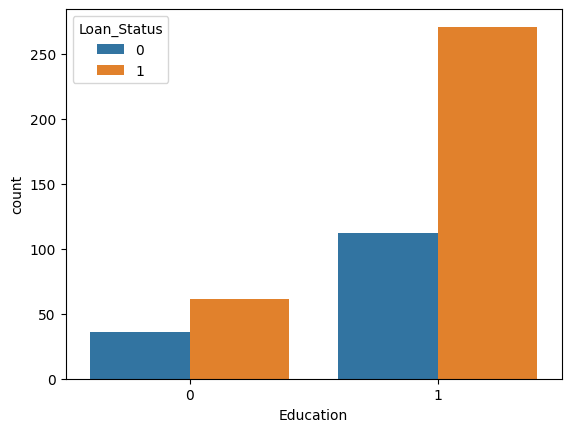

In [29]:
sns.countplot(x="Education",hue = 'Loan_Status',data=data )

<Axes: xlabel='Married', ylabel='count'>

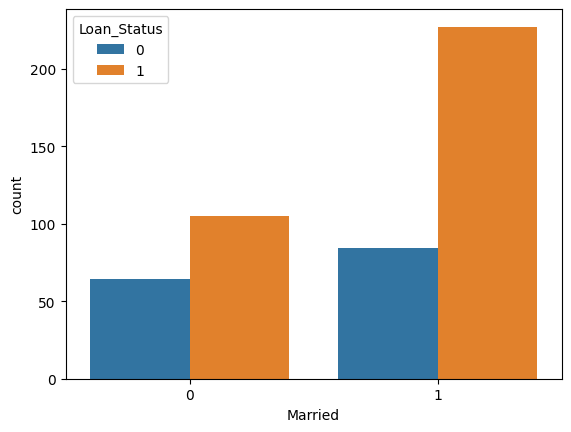

In [31]:
sns.countplot(x="Married",hue = 'Loan_Status',data=data )

<Axes: xlabel='Property_Area', ylabel='count'>

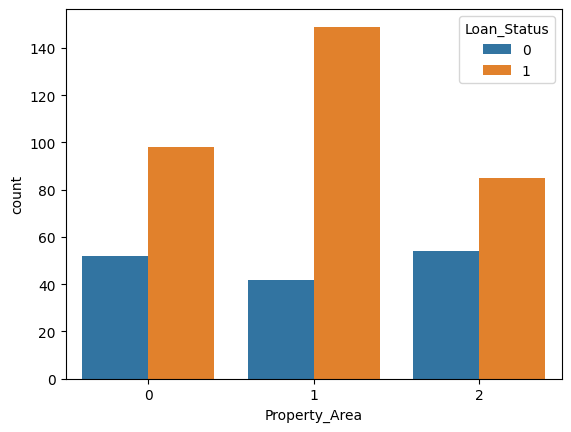

In [32]:
sns.countplot(x="Property_Area",hue = 'Loan_Status',data=data )

In [33]:
train_set , test_set = train_test_split(data,test_size=0.2 , random_state=5)
train_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
402,LP002297,1,0,0,1,0,2500,20000.0,103.0,360.0,1.0,1,1
382,LP002231,0,0,0,1,0,6000,0.0,156.0,360.0,1.0,0,1
422,LP002361,1,1,0,1,0,1820,1719.0,100.0,360.0,1.0,0,1
225,LP001751,1,1,0,1,0,3250,0.0,170.0,360.0,1.0,2,0
394,LP002266,1,1,2,1,0,3100,1400.0,113.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,LP002648,1,1,0,1,0,2130,6666.0,70.0,180.0,1.0,1,0
153,LP001532,1,1,2,0,0,2281,0.0,113.0,360.0,1.0,2,0
244,LP001811,1,1,0,0,0,3406,4417.0,123.0,360.0,1.0,1,1
263,LP001871,0,0,0,1,0,7200,0.0,120.0,360.0,1.0,2,1


In [34]:
test_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
457,LP002467,1,1,0,1,0,3708,2569.0,173.0,360.0,1.0,0,0
179,LP001630,1,0,0,0,0,2333,1451.0,102.0,480.0,0.0,0,0
287,LP001926,1,1,0,1,0,3704,2000.0,120.0,360.0,1.0,2,1
286,LP001925,0,0,0,1,1,2600,1717.0,99.0,300.0,1.0,1,0
159,LP001552,1,1,0,1,0,4583,5625.0,255.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002175,1,1,0,1,0,4750,2333.0,130.0,360.0,1.0,0,1
483,LP002541,1,1,0,1,0,10833,0.0,234.0,360.0,1.0,1,1
378,LP002224,1,0,0,1,0,3069,0.0,71.0,480.0,1.0,0,0
133,LP001482,1,1,0,1,1,3459,0.0,25.0,120.0,1.0,1,1


In [37]:
X_train = train_set.drop(['Loan_ID',"Loan_Status"],axis = 1)
Y_train = train_set['Loan_Status'].copy()

In [40]:
X_test = test_set.drop(['Loan_ID',"Loan_Status"],axis = 1)
Y_test = test_set['Loan_Status'].copy()

# Model tayyorlash

In [38]:
classifier = svm.SVC(kernel='linear')

In [39]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [42]:
Y_predicted = classifier.predict(X_test)

In [43]:
Test_data_accuray = accuracy_score(Y_predicted, Y_test)

In [44]:
print("Accuracy data score : ", Test_data_accuray)

Accuracy data score :  0.7916666666666666
